In [28]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import pandas as pd
from ODEDataset import ODEDataset

## Extractors

In [29]:
def extract_features_and_targets_columns(src: pd.DataFrame) -> pd.DataFrame:
    columns = [
        # Features

        'People_per_household',
        'Number_of_rooms',
        'Distance_from_grid',
        'Distance_from_city',
        'Population_density_lev_3',
        'Relative_wealth_index_lev_2',
        'Relative_wealth_index_lev_3',
        'masl_lev_3',
        'Measurement_age',
        'Number_youngsters',
        'Number_adults',
        'Number_elderly',
        'Monthly_electricity_expenditure',
        'Size_of_business_employees',
        'Seasonal_business',
        'Age_of_business',
        'Clean_fuel',
        'Night_hours_study_children',
        'Pre-paid_tariff',
        'HH_with_home_business',
        'Access_to_credit',
        'Street_lighting_present',

        'Size_of_business_revenues',
        'Years_of_HHH_in_community',
        'Dwelling_quality_index',
        'Land_owned',
        'Monthly_electricity_consumption',
        # Categorical
        "Urban/rural",
        "Climate_zone_lev_1",
        "Climate_zone_lev_2",
        'Climate_zone_lev_3',
        "Type_of_business",
        "System_management",
        "Connection_type",
        "Male/female_HHH",
        "Tariff_payment_frequency",
        "Tariff_payment_method",
        "Socio_status_HHH",
        "House_ownership_rental_free",
        "Marital_status_HHH",
        "Tariff_type",

        # Target
        'Presence_light_bulb',
    ]
    return src[columns]

## Fillers


In [31]:
def fill_missing_values(src: pd.DataFrame) -> pd.DataFrame:
    # Fill with 1.0
    columns = [
        'People_per_household',
        'Number_of_rooms',
    ]
    for column in columns:
        src[column] = src[column].fillna(value=1.0)

    # Fill with mean
    columns = [
        'Relative_wealth_index_lev_2',
        'Relative_wealth_index_lev_3',
        'Dwelling_quality_index',
    ]

    for column in columns:
        src[column] = src[column].fillna(src[column].mean())

    # Fill with zero
    columns = [
        'Distance_from_grid',
        'Distance_from_city',
        'Population_density_lev_3',
        'masl_lev_3',
        'Monthly_electricity_expenditure',
        'Size_of_business_employees',
        'Land_owned',
        'Night_hours_study_children',
        'Clean_fuel',
        'Seasonal_business',
        'Pre-paid_tariff',
        'HH_with_home_business',
        'Access_to_credit',
        'Street_lighting_present',
        'Size_of_business_revenues',
        'Years_of_HHH_in_community',
        'Monthly_electricity_consumption',
        'Age_of_business',
        'Number_youngsters',
        'Number_adults',
        'Number_elderly',
        'Measurement_age',
        'Presence_light_bulb',
    ]

    for column in columns:
        src[column] = src[column].fillna(0.0)

    return src


## Categorical columns

In [34]:
from categorizers import *

ds = ODEDataset().from_csv("../playground/data/Database_ready_v2.csv")
ds = (ds
      .apply(build_climate_zone_features)
      .apply(build_urban_rural_features)
      .apply(build_business_type_features)
      .apply(build_system_management_features)
      .apply(build_connection_type_features)
      .apply(build_gender_features)
      .apply(build_tariff_payment_frequency_features)
      .apply(build_tariff_payment_method_features)
      .apply(build_social_status_features)
      .apply(build_house_ownership_features)
      .apply(build_martial_status_features)
      .apply(build_tariff_type_features)
      .apply(extract_features_and_targets_columns)
      .apply(fill_missing_values)
      )

df = ds.to_dataframe()
df

,People_per_household,Number_of_rooms,Distance_from_grid,Distance_from_city,Population_density_lev_3,Relative_wealth_index_lev_2,Relative_wealth_index_lev_3,masl_lev_3,Measurement_age,Number_youngsters,...,System_management,Connection_type,Male/female_HHH,Tariff_payment_frequency,Tariff_payment_method,Socio_status_HHH,House_ownership_rental_free,Marital_status_HHH,Tariff_type,Presence_light_bulb
0,5.0,10.0,18.013,39.542,30.881265,0.241406,-0.004294,1737.829883,2.0,2.20,...,2.0,2,0.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0
1,6.0,7.0,18.013,39.542,30.881265,0.241406,-0.004294,1737.829883,2.0,2.64,...,2.0,2,0.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0
2,6.0,4.0,18.013,39.542,30.881265,0.241406,-0.004294,1737.829883,2.0,2.64,...,2.0,2,0.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0
3,6.0,7.0,18.013,39.542,30.881265,0.241406,-0.004294,1737.829883,2.0,2.64,...,2.0,2,0.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0
4,2.0,4.0,18.013,39.542,30.881265,0.241406,-0.004294,1737.829883,2.0,0.88,...,2.0,2,0.0,4.0,0.0,6.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,8.0,5.0,0.000,0.000,0.000000,0.241406,0.000000,0.000000,0.0,4.00,...,2.0,2,0.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0
7761,8.0,3.0,0.000,0.000,0.000000,0.241406,0.000000,0.000000,0.0,3.00,...,2.0,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7762,3.0,3.0,0.000,0.000,0.000000,0.241406,0.000000,0.000000,0.0,0.00,...,0.0,3,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0
7763,9.0,1.0,0.000,0.000,0.000000,0.241406,0.000000,0.000000,0.0,4.00,...,2.0,2,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0


In [36]:
feature_columns = ds.get_columns()
target_col = "Presence_light_bulb"
feature_columns.remove(target_col)
tf_ds = ds.to_tf_dataset(feature_columns, [target_col])
for x, y in tf_ds:
    print(x)
    print(y)
    break

torch_ds = ds.to_tf_dataset(feature_columns, [target_col])

for x, y in torch_ds:
    print(x.shape)
    print(y.shape)
    break

tf.Tensor(
[ 5.0000000e+00  1.0000000e+01  1.8013000e+01  3.9542000e+01
  3.0881266e+01  2.4140623e-01 -4.2944043e-03  1.7378298e+03
  2.0000000e+00  2.2000000e+00  2.6750000e+00  1.2500000e-01
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  6.7793524e-01  0.0000000e+00  0.0000000e+00  2.0000000e+00
  1.2000000e+01  1.2000000e+01  1.2000000e+01  0.0000000e+00
  2.0000000e+00  2.0000000e+00  0.0000000e+00  4.0000000e+00
  0.0000000e+00  5.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00], shape=(41,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
(41,)
(1,)


## TensorFlow Model

In [68]:
import tensorflow as tf

In [73]:
val_len = int(0.2 * len(tf_ds))
train_ds = tf_ds.skip(val_len).shuffle(1000).batch(32)
val_ds = tf_ds.take(val_len).shuffle(1000).batch(32)
for i, j in train_ds:
    print(i.shape, j.shape)
    break


(32, 41) (32, 1)


In [74]:
input_size = len(feature_columns)

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(input_size, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [75]:
result = model.fit(train_ds, epochs=100)

Epoch 1/100
195/195 [==============================] - 2s 4ms/step - loss: 3484.9861 - accuracy: 0.6626
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 390.3849 - accuracy: 0.6713
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 5575.9595 - accuracy: 0.6262
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 3774.2141 - accuracy: 0.6132
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 5176.4478 - accuracy: 0.6718
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 5549.7148 - accuracy: 0.6062
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 1809.4902 - accuracy: 0.6550
Epoch 8/100
195/195 [==============================] - 1s 4ms/step - loss: 22.3105 - accuracy: 0.7395
Epoch 9/100
195/195 [==============================] - 1s 4ms/step - loss: 6827.4204 - accuracy: 0.6178
Epoch 10/100
195/195 [==============================] - 1s 4ms/step

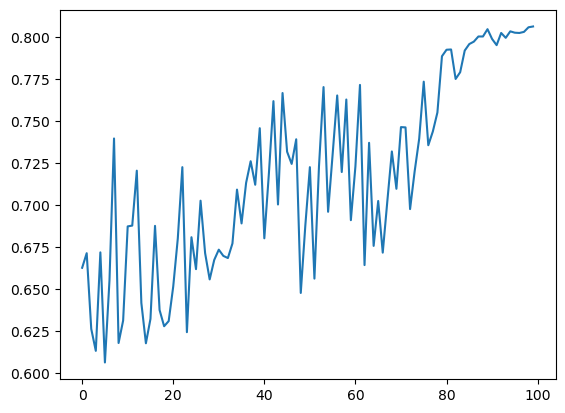

In [76]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
loss = result.history['loss']

plt.plot(acc)
# plt.plot(loss)

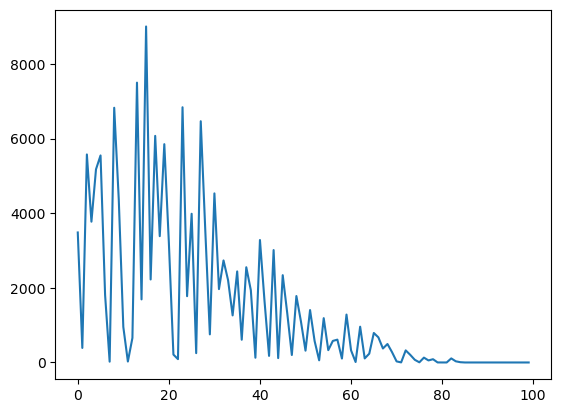

In [77]:
plt.plot(loss)

In [79]:
model.evaluate(val_ds)

49/49 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.9382


[0.3640976548194885, 0.9381841421127319]